# Demo: Linear regression with different basis functions (Lecture 6)
This Jupyter notebook accompanies Lecture 6 of the class Fundamentals of Machine Learning (FML).
By loading it in Jupyter or Jupyter Lab you can rerun it on your own and also modify it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Introduction
We set a seed for reproducability.

In [2]:
np.random.seed(123456)

## Setting up the example
Our running example is the function $f: [0,1] \rightarrow \mathbb{R}$ with $f(x)=\sin(2\pi x)$,
which is our fixed, but unknown ground truth.
We have data $(x_1,y_1),\ldots,(x_N,y_N)$, where $x_i$ are equi-distant inputs from $[0,1]$ and $y_i=f(x_i)+\epsilon_i$,
with $\epsilon_1,\ldots,\epsilon_N$ i.i.d. normally distributed.

Let's generate a data set with $N=10$ samples.

In [3]:
# We use this grid for evaluating the function
n_grid = 1000
xs = np.linspace(0,1,n_grid)
ys = np.sin(2*np.pi*xs)

# Start with a small training data set
n_train = 10
noise_sd = 0.2
xs_train = np.linspace(0,1,n_train)
ys_train = np.sin(2*np.pi*xs_train) + np.random.normal(loc=0, scale=noise_sd, size=n_train)

Below we plot the function (solid green) and the data set (blue dots).

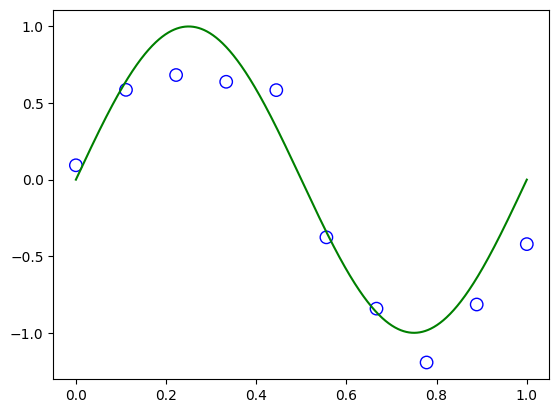

In [4]:
plt.plot(xs, ys, 'g')
_ = plt.scatter(xs_train, ys_train, s=80, facecolors='none', edgecolor='blue')

## Linear Basis Function Models
We now demonstrate linear regression using different families of basis functions.
### Introducing the basis functions
We consider polynomial, Gaussian and sigmoidal basis functions.
First, let us consider the polynomial basis functions. To be precise, we consider the monomial functions
$x \mapsto 1$, $x \mapsto x$, $x \mapsto x^2$, ..., $x \mapsto x^k$ up to some maximum $m$.
Note that every polynom of degree less or equal to $k$ can be written as a unique weighted sum of these functions.

Below we plot the first 10 of these functions.

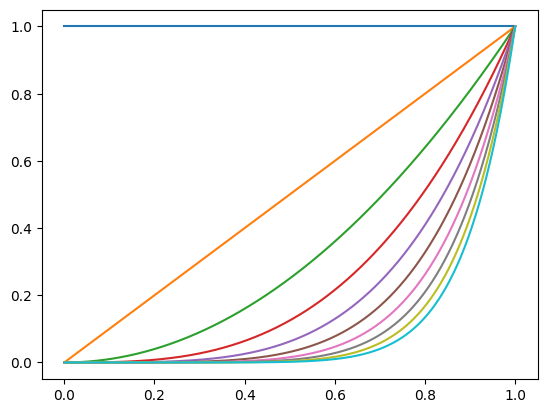

In [11]:
for d in range(10):
    plt.plot(xs, xs**d)

We now define the Gaussian basis function. It has a location parameter $\mu$ (this is where the peak is located)
and a positive shape or scaling parameter $s$ (the smaller $s$ is, the sharper the peak).

In [12]:
def gaussian(x, mu, s):
    return np.exp(- (x-mu) **2 / (2 * s**2))

To illustrate this family of functions, we plot 10 such functions with $\mu$ equidistant 
from $[0,1]$ and shape parameter 0.1.

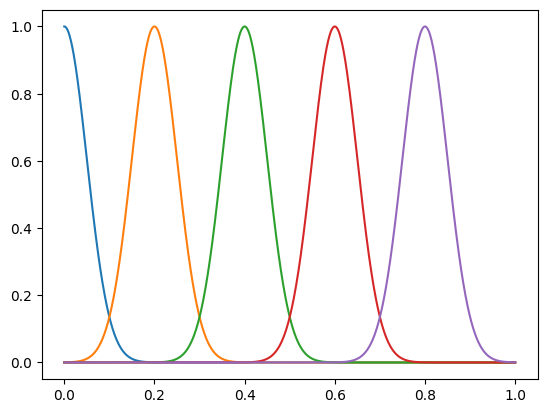

In [18]:
for i in range(5):
    plt.plot(xs, gaussian(xs, i/5, 0.05))

To illustrate the shape paramter, we plot Gaussian with $\mu=0.5$ and $s=0.1, 0.2, 0.5$

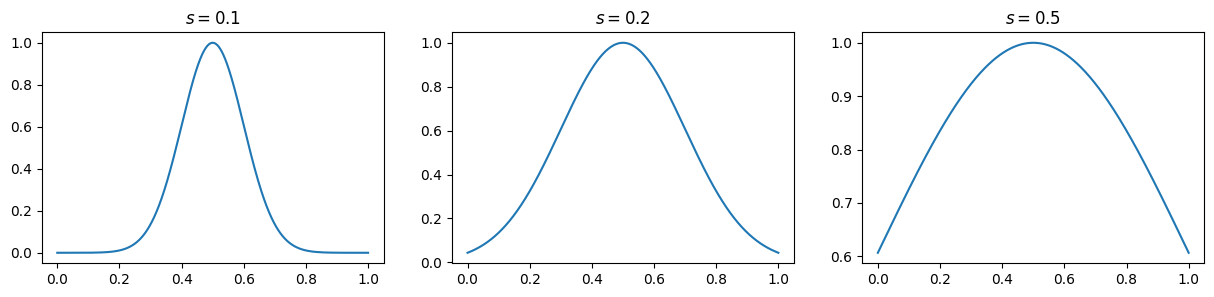

In [19]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(xs, gaussian(xs, 0.5, 0.1))
plt.title('$s=0.1$')
plt.subplot(1,3,2)
plt.plot(xs, gaussian(xs, 0.5, 0.2))
plt.title('$s=0.2$')
plt.subplot(1,3,3)
plt.title('$s=0.5$')
_ = plt.plot(xs, gaussian(xs, 0.5, 0.5))

Finally, we define the sigmoidal basis function. It is S-shaped (hence the name), has a location parameter
$\mu$ (this is where the function crosses 0 on the $y$-axis) and a positive scale or shape parameter $s$
(the smaller $s$, the steeper the S)

In [20]:
def sigmoid(x,mu,s): 
    return 1 / (1 + np.exp(-(x-mu)/s))

To illustrate the location parameter, we plot 10 such functions with $\mu$ equidistant 
from $[0,1]$ and shape parameter 0.1.

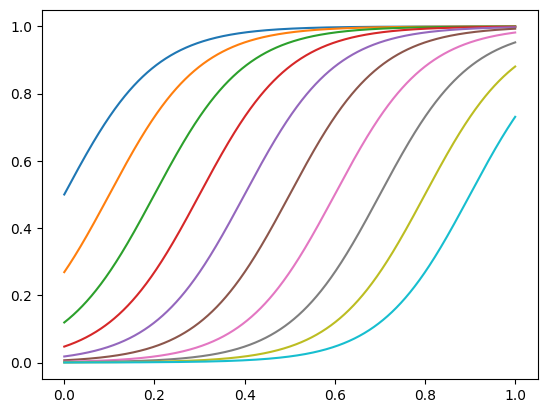

In [26]:
for i in range(10):
    plt.plot(xs, sigmoid(xs, i/10, 0.1))

In order illustrate the shape parameter, we now plot sigmoidal functions with location parameter 0.5 and $s=0.1,0.05, 0.01$. Note that with decreasing scale parameter the sigmoid resembles a threshold function.

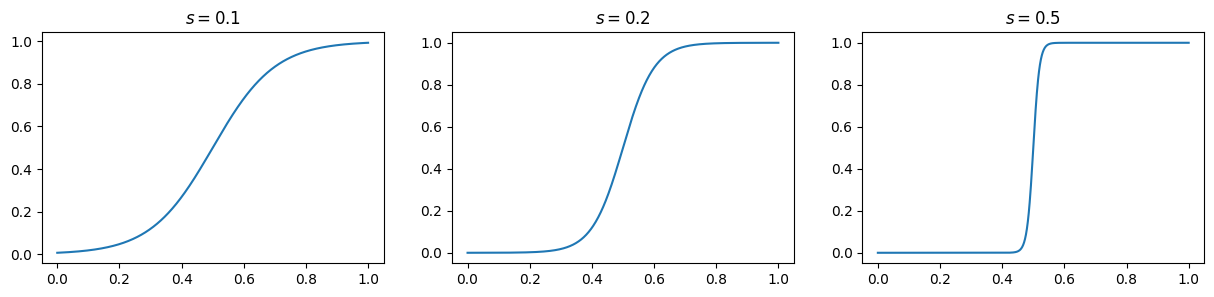

In [27]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(xs, sigmoid(xs, 0.5, 0.1))
plt.title('$s=0.1$')
plt.subplot(1,3,2)
plt.plot(xs, sigmoid(xs, 0.5, 0.05))
plt.title('$s=0.2$')
plt.subplot(1,3,3)
plt.title('$s=0.5$')
_ = plt.plot(xs, sigmoid(xs, 0.5, 0.01))

### Linear regression with different basis functions
We now run linear regression using the basis functions defined above. First, we define an auxiliary function
for fitting and plotting. Note that the underlying principle, i.e. linear regression, is the same for all basis functions.

In [28]:
# Helper function
def plot_fit_data(xs_train, ys_train, basis_fnc, M, s):
    if basis_fnc == 'gaussian':
        regression_mat = gaussian(xs_train.reshape([-1,1]), np.linspace(0,1,M).reshape([1,-1]),s)
        plot_mat = gaussian(xs.reshape([-1,1]), np.linspace(0,1,M).reshape([1,-1]),s)
        basis_fnc_name = 'Gaussian'
    elif basis_fnc == 'sigmoid':
        regression_mat = sigmoid(xs_train.reshape([-1,1]), np.linspace(0,1,M).reshape([1,-1]),s)
        plot_mat = sigmoid(xs.reshape([-1,1]), np.linspace(0,1,M).reshape([1,-1]),s)
        basis_fnc_name = 'sigmoid'
    else:
        regression_mat = np.vander(xs_train, M+1, increasing=True)
        plot_mat = np.vander(xs, M+1, increasing=True) 
        basis_fnc_name = 'polynomial'
    
    coeffs = np.linalg.lstsq(regression_mat, ys_train, rcond=None)[0]
    ys_fit = plot_mat @ coeffs
    
    # True function
    plt.plot(xs, ys, 'g')
    # Training data
    plt.scatter(xs_train, ys_train, s=80, facecolors='none', edgecolor='blue')
    # Fit (using selected basis functions)
    plt.plot(xs, ys_fit, 'r') 
    plt.text(0.9, 0.9, f'$M={M}$')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-1.5, 1.5])
    plt.title('Fit with ' + basis_fnc_name + ' basis functions')
    
def plot_fit(basis_fnc, M, s=0.1):
    plot_fit_data(xs_train, ys_train, basis_fnc, M, s)

Here are the fits corresponding to Gaussian, sigmoidal and polynomial basis functions.

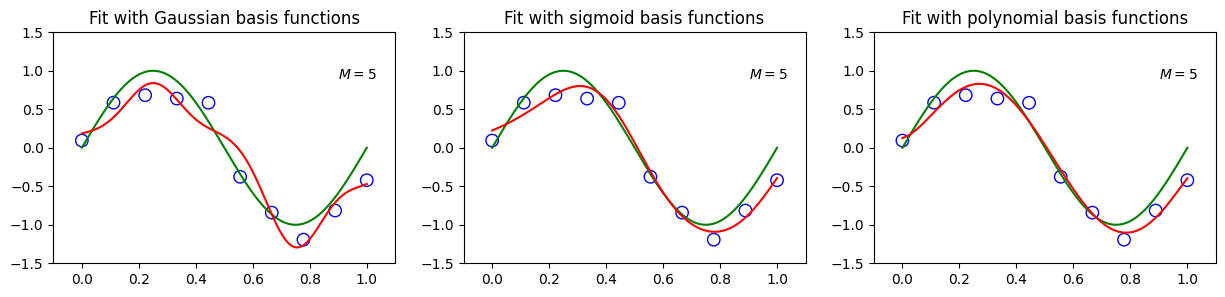

In [29]:
M_choice = 5   # 0,1,2,3,5,7,9
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plot_fit('gaussian', M_choice)
plt.subplot(1,3,2)
plot_fit('sigmoid', M_choice)
plt.subplot(1,3,3)
plot_fit('poly', M_choice)

## Localized and global basis functions
An important difference between Gaussian and polynomial basis functions is the influence of each input point.

In [30]:
def plot_train_fit(xs_train, basis_fnc, M, s=0.1):
    ys_train = np.sin(2*np.pi*xs_train) + np.random.normal(loc=0, scale=noise_sd, size=n_train)
    plot_fit_data(xs_train, ys_train, basis_fnc, M, s)

We now change a single training input-output pair.

In [31]:
ys_train_modified = ys_train.copy()
ys_train_modified[2] = 0  # 0.3, 0
M_choice = 9  # 10

First, we use Gaussian basis functions. Note that the change in the fitted function 
is barely recognizable further away from the changed point

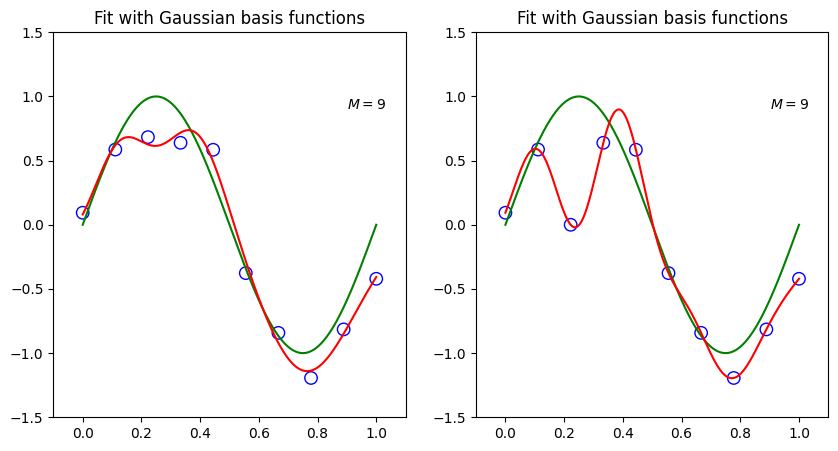

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_fit('gaussian', M_choice)
plt.subplot(1,2,2)
plot_fit_data(xs_train, ys_train_modified, 'gaussian', M_choice, 0.1)

Now we compare this to polynomial basis functions.

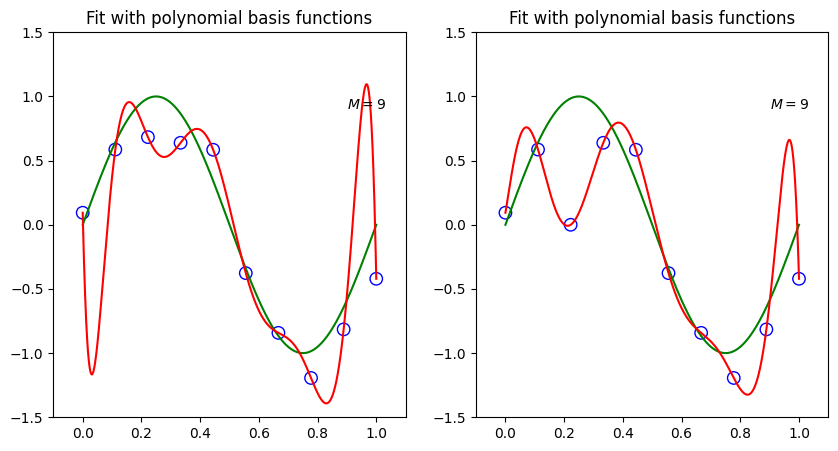

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_fit('poly', M_choice)
plt.subplot(1,2,2)
plot_fit_data(xs_train, ys_train_modified, 'poly', M_choice, 0.1)